In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importing Required Libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# from google.colab.patches import cv2_imshow

# Loading the Image using the imread function of OpenCV

In [3]:
RLP_img1 = cv2.imread(r'C:\Users\Dell\Desktop\DLASSIGN2\RusNoPlate1.jpg')

# Pre-processing the Image 
1. Creating a funcion to Convert the image using cv2.Color(img, cv2.COLOR_BGR2RGB)
2. Displaying the preprocess image

In [4]:
def pre_process(img):
    img_pp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_pp)
#     cv2.imshow("output1",img_pp)
    return img_pp

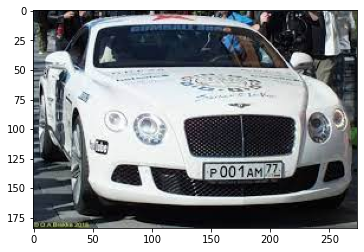

In [5]:
img1 = pre_process(RLP_img1)

1. Creating a function for a classifier using the HaarCascade_russian_plate_number.xml file
2. Detecting the Car License Plates using the Classifier
3. Displaying the Result

In [6]:
def hc_func(path):
    hc = cv2.CascadeClassifier(path)
    RusLicPlate = hc.detectMultiScale(img1,scaleFactor=1.2,minNeighbors=5,minSize=(25,25))
    for x,y,w,h in RusLicPlate:
        cv2.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),3) 
    plt.imshow(img1)
    return 

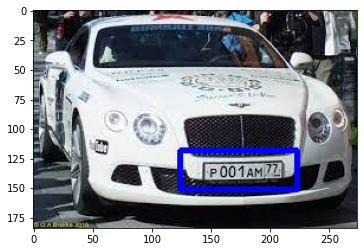

In [7]:
path1 = r'C:\Users\Dell\Desktop\DLASSIGN2\haarcascade_russian_plate_number.xml'
hc_func(path1)


Image after blurring


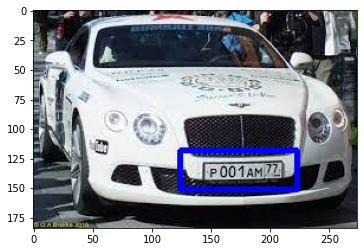

In [8]:
# Show processed image after blurring
print('\nImage after blurring')
blur1=cv2.blur(img1,(5,5))      # The more size of kernel cause more blurring 
plt.imshow(img1)
# cv2.imshow('output3',blur1)
plt.show()


Image after Median blurring


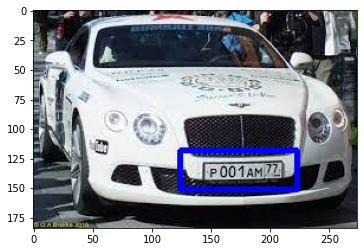

In [9]:
print('\nImage after Median blurring')
blur2=cv2.medianBlur(img1,5)      # The more size of kernel cause more blurring 
plt.imshow(img1)
# cv2.imshow('output4',blur2)
plt.show()

In [10]:
RusLiPl_HC = cv2.CascadeClassifier(r'C:\Users\Dell\Desktop\DLASSIGN2\haarcascade_russian_plate_number.xml')
cap = cv2.VideoCapture(r'C:\Users\Dell\Desktop\DLASSIGN2\RusLiPlateVideo.mp4')

while True:
    ret,img=cap.read()
    if not ret:
        continue
        
    rlp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    rlp_hc = RusLiPl_HC.detectMultiScale(rlp_img,scaleFactor=1.2,minNeighbors=5,minSize=(25,25))

    for x,y,w,h in rlp_hc:
        cv2.rectangle(rlp_img,(x,y),(x+w,y+h),(0,0,255),3) 

        cv2.imshow('output5',rlp_img)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()